In [2]:
from PIL import Image
import numpy as np
img = Image.open("./images/bird.png")
img.show()

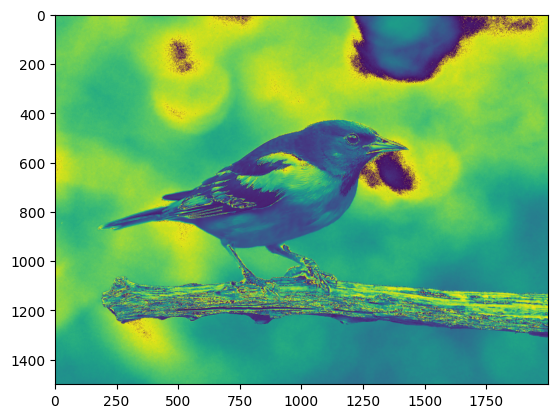

(1500, 2000, 3)

In [ ]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

data = imageio.imread('./images/bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()
#data.shape

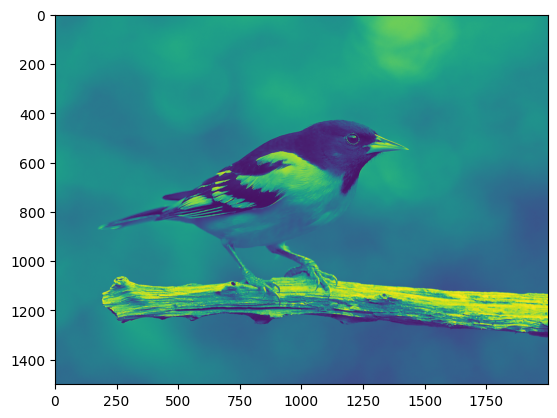

(1500, 2000)

In [5]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
data = imageio.imread('./images/bird.png', mode="F")
plt.imshow(data)
plt.show()
data.shape

image saved


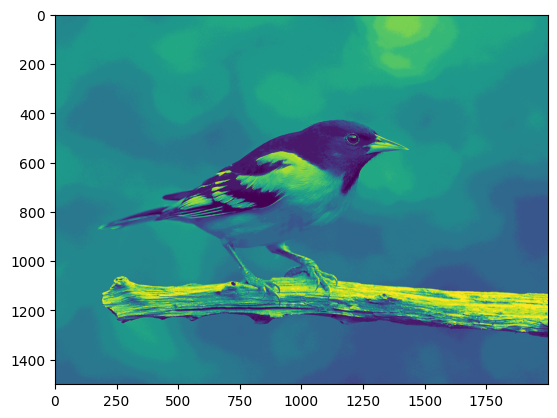

(1500, 2000)

In [7]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

data = imageio.imread('./images/bird.png', mode="F").astype(np.uint8)
cl = data & 0xF0
imageio.imsave('./images/bird_grayscale.png', cl)
print("image saved")
data = imageio.imread('./images/bird_grayscale.png')
plt.imshow(data)
plt.show()
data.shape

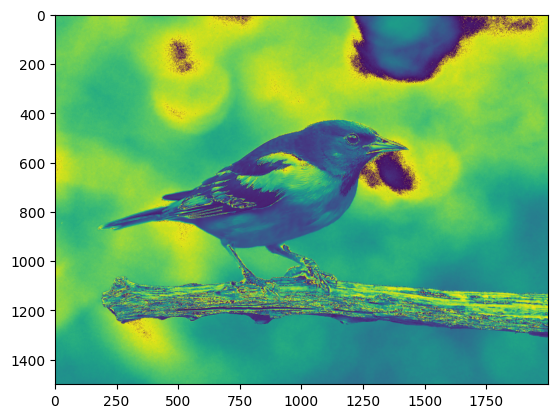

(1500, 2000, 3)

In [8]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

data = imageio.imread('./images/bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()
data.shape

In [9]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import colorsys

a = colorsys.rgb_to_hsv(255,0,0)
print(a)
b = colorsys.hsv_to_rgb(1,0,0)
print(b)
c = colorsys.rgb_to_hsv(0,255,0)
print(c)
d = colorsys.hsv_to_rgb(1,1,255)
print(d)

(0.0, 1.0, 255)
(0, 0, 0)
(0.3333333333333333, 1.0, 255)
(255, 0.0, 0.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


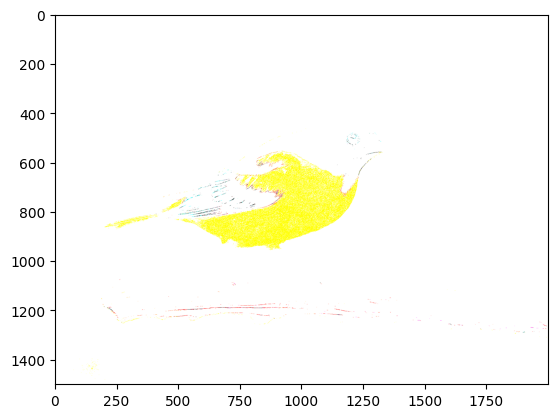

In [10]:
#2.6 Ứng dụng chuyển đổi hệ màu

import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import colorsys

rgb = imageio.imread('./images/bird.png')
rgb_2_hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb_2_hsv(rgb[:,:,0], rgb[:,:,1], rgb[:,:,2])
h *= h
hsv_2_rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv_2_rgb(h,s,v)
rgb2 = np.array(rgb2).transpose((1,2,0))
plt.imshow(rgb2)
plt.show()


Bài tập

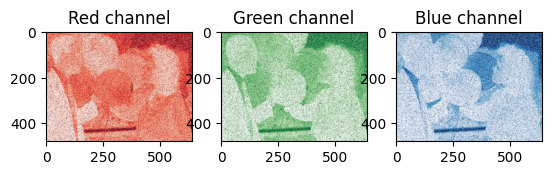

In [13]:
#1. viết chương trình nạp 1 ảnh và lưu thành 3 ảnh với 3 màu khác nhau
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import colorsys

data = imageio.imread('./exercise/balloons_noisy.png')
#red color spectrum
plt.subplot(1,3,1)
plt.title("Red channel")
plt.imshow(data[:,:,0], cmap='Reds')
#green color spectrum
plt.subplot(1,3,2)
plt.title("Green channel")
plt.imshow(data[:,:,1], cmap='Greens')
#blue color spectrum
plt.subplot(1,3,3)
plt.title("Blue channel")
plt.imshow(data[:,:,2], cmap='Blues')
plt.show()

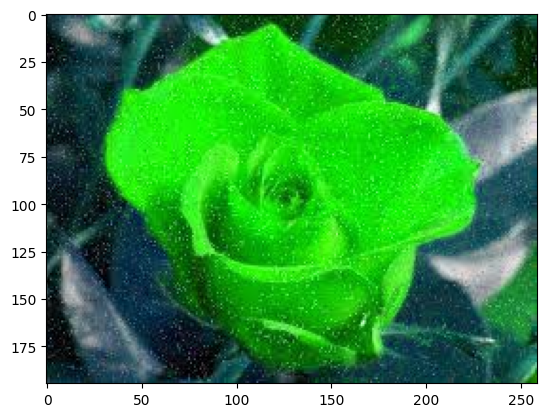

In [16]:
#Bai 2: hoán đổi vị trí màu
img = imageio.imread('./exercise/flower.jpeg')

swap = img[:,:,[2,0,1]]
imageio.imwrite('./exercise/flower_swap.png', swap)
plt.imshow(swap)
plt.show()

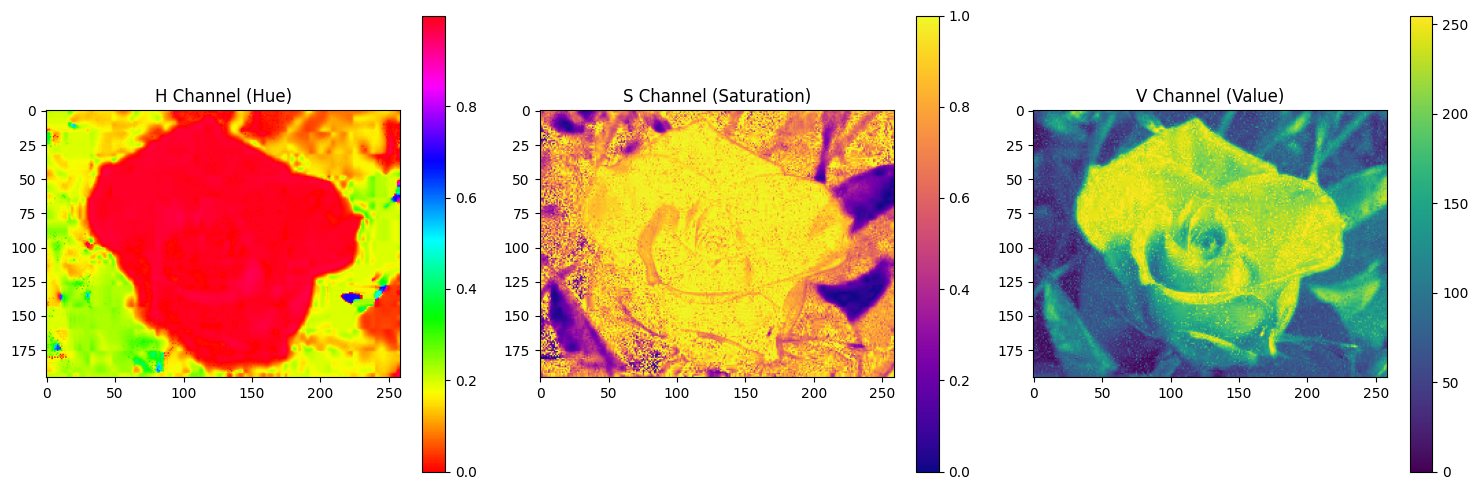

HSV channel images saved successfully!


In [17]:
#3, chuyển đổi ảnh sang HSV và lưu ảnh với 3 màu khác nhau

# Load image and convert to HSV
rgb_img = imageio.imread('./exercise/flower.jpeg')
rgb_2_hsv = np.vectorize(colorsys.rgb_to_hsv)
h_channel, s_channel, v_channel = rgb_2_hsv(rgb_img[:,:,0], rgb_img[:,:,1], rgb_img[:,:,2])

# Save each HSV channel as separate images with different colormaps
# H channel (Hue) - using HSV colormap
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("H Channel (Hue)")
plt.imshow(h_channel, cmap='hsv')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("S Channel (Saturation)")
plt.imshow(s_channel, cmap='plasma')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("V Channel (Value)")
plt.imshow(v_channel, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

# Save the HSV channels as separate image files
# Convert to 0-255 range for saving
h_normalized = (h_channel * 255).astype(np.uint8)
s_normalized = (s_channel * 255).astype(np.uint8)
v_normalized = v_channel.astype(np.uint8)

imageio.imsave('./exercise/flower_hue.png', h_normalized)
imageio.imsave('./exercise/flower_saturation.png', s_normalized)
imageio.imsave('./exercise/flower_value.png', v_normalized)

print("HSV channel images saved successfully!")


In [ ]:
#4. chuyển sang HSV va luu anh moi voi kenh 
from PIL import Image
import imageio.v2 as imageio
import numpy as np
import colorsys

# Bước 1: Đọc ảnh dùng imageio
img = imageio.imread('input.jpg')

# Bước 2: Chuyển ảnh sang dạng numpy array (RGB -> HSV)
# Normalize giá trị RGB từ 0-255 -> 0-1
img_rgb = img / 255.0
hsv_img = np.zeros_like(img_rgb)

# Áp dụng chuyển đổi cho từng pixel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img_rgb[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)

        # Bước 3: Chỉnh H và V
        h = (1/3) * h
        v = (3/4) * v

        # Gán lại
        hsv_img[i, j] = colorsys.hsv_to_rgb(h, s, v)

# Bước 4: Đưa về 0-255 để lưu
output_img = (hsv_img * 255).astype(np.uint8)

# Bước 5: Lưu ảnh dùng imageio
imageio.imwrite('output.jpg', output_img)
